## Harmonic oscillator
    IV. Calculate the Hamiltonian and plot the 5 states with lowest energy, making sure that your grid is adequate.

### Hamiltonian 

For the free non-interacting electrons, following would be the Kohn-Sham hamiltonian. 
$$\hat{H} = \hat{T} = \frac12 \frac{d^2}{dx^2} + x^2$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags

In [2]:
def D(x, N=100):
    '''
    Returns the operator form of first-derivative

            Parameters:
                    x (array): grid of 1D array
                    N (int): number of points on the grid

            Returns:
                    D (array): first-derivative operator
    '''
    h = x[1] - x[0]
    k = [np.ones(N-1), -np.ones(N-1)]
    offset = [1, -1]
    D = diags(k, offset).toarray()
    D = D/(2 * h)
    # # Boundary values where it is not well defined
    D[0, 0] = 0
    D[0, 1] = 0
    D[1, 0] = 0
    D[N-1, N-2] = 0
    D[N-2, N-1] = 0
    D[N-1, N-1] = 0
    return D


def D2(x, N=100):
    '''
    Returns the operator form of second-derivative

            Parameters:
                    x (array): grid of 1D array
                    N (int): number of points on the grid

            Returns:
                    D (array): first-derivative operator
    '''
    h = x[1] - x[0]
    k1 = [np.ones(N-1), -2*np.ones(N), np.ones(N-1)]
    offset = [-1, 0, 1]
    D2 = diags(k1, offset).toarray()
    D2 = D2/(h ** 2)
    # Boundary values where it is not well defined
    D2[0, 0] = 0
    D2[0, 1] = 0
    D2[1, 0] = 0
    D2[N-1, N-2] = 0
    D2[N-2, N-1] = 0
    D2[N-1, N-1] = 0
    return D2

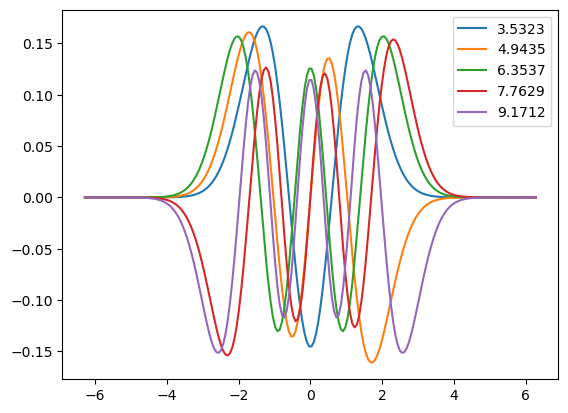

In [3]:
L = 2 * np.pi
N = 200
x = np.linspace(-L, L, N)
X = np.diagflat(x*x)
H = -D2(x, N)/2 + X
E, V = np.linalg.eigh(H)

for i in range(2, 7):
    plt.plot(x, V[:, i], label=f"{E[i]:.4f}")
    plt.legend(loc=1)